# Final Exam

This is an open-book exam. The use of AI (artificial intelligence) is not allowed. Communicating with other people during the exam is not allowed. Disregarding these rules will be counted as cheating and will be sanctioned accordingly.

The exam is scheduled for 120 minutes. There are 40 points total on the exam. 

We will deduct points if the following requirements are not fulfilled:

 - hand in your solutions as a single Jupyter Notebook
 - answers (except for code) should be written in Markdown
 - use comments in the code sections to explain what you do
 - if you face a problem that you are not able to solve or you think your answer is wrong, explain why you think it is wrong and what you would expect.
 - make sure that figures are properly labelled: label the axes and add a legend.


# Problem 1 (6 points)

You will need the following imports:

```python
import numpy as np
import matplotlib.pyplot as plt
from sympy import solve, symbols, Lambda, exp
```

### (a) (2 points)

Use `sympy` in order to take the derivate of the following function $f$ with respect to $x$:

$$f(x) = a\left(7x - e^{x}\right). $$

__Hint:__ you need to import `exp` from the `sympy` package.

### (b) (2 points)

Set $a = 2$ and find the $x$ value that maximizes $f(x) = a\left(7x - e^{x}\right)$.

### (c) (1 point)

Plot the function $f(x) = a\left(7x - e^{x}\right)$ for values of $x$ between 0 and 4 (using $a = 2$). Is the answer you found in __(b)__ indeed a maximum?

### (d) (1 point)

How does your result in __(b)__ change when setting $a = 1$?

__Solution:__ it does not.


In [1]:
# Solution (a):

from sympy import solve, symbols, Lambda, exp

x, a = symbols('x, a', real=True)
f = Lambda((x,a),a*(7*x-exp(x)))
f_x = f(x,a).diff(x)
print(f_x)
f_x

a*(7 - exp(x))


a*(7 - exp(x))

In [2]:
# Solution (b)

a_val = 2
f_val = a_val*(7*x-exp(x))
x_star = solve(f_val.diff())[0]
print(f"x_star = {x_star}")

x_star = log(7)


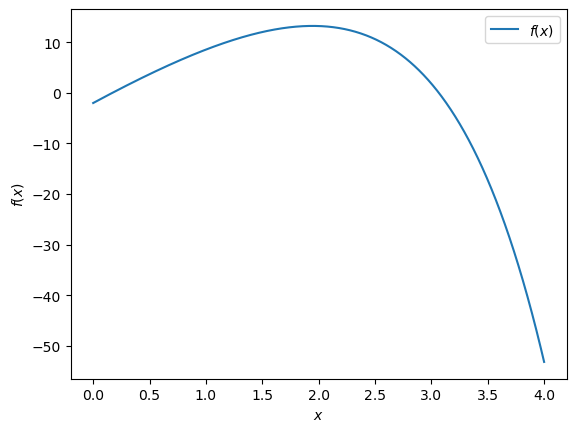

In [3]:
# Solution (c)
import numpy as np
import matplotlib.pyplot as plt

x_grid = np.linspace(0,4,1000)
a_val = 2
fs = a_val*(7*x_grid-np.exp(x_grid))


fig, ax = plt.subplots()

ax.plot(x_grid, fs, label="$f(x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.legend()

plt.show()


# Problem 2 (10 points)

Start with the following imports:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```
### (a) (1 point)

Consider the random variable $a_t$ which is determined by 


$$a_t = \delta_1 a_{t-1} + \delta_2 a_{t-2} + \epsilon_t,$$

where $\epsilon_t$ is independently drawn from a normal distribution with mean $\mu_{\epsilon}$ and standard deviation $\sigma_{\epsilon}$, and $\delta_1$ and $\delta_2$ are constant parameters.

Set the initial values to $a_0 = 0$ and $a_{-1} = 0$ and the parameters to $\delta_1 = 0.6$, $\delta_2 = -0.2$, $\mu_{\epsilon} = -1$ and  $\sigma_{\epsilon} = 3$.

Randomly draw $\epsilon_t$ from the specified distributions in every period.
Plot the first 20 periods starting with $a_1$.

In Python, use the following names:

- use `delta1` and `delta2` for $\delta_1$ and $\delta_2$
- use `mu_e` for $\mu_{\epsilon}$
- use `sigma_e` for $\sigma_{\epsilon}$

### (b) (2 points)

Consider the random variable $b_t$ which is determined by

$$b_t = \omega_1 b_{t-1} + \omega_2 a_{t} + \eta_t,$$

where $\eta_t$ is independently drawn from a normal distribution with mean $\mu_{\eta}$ and standard deviation $\sigma_{\eta}$, and $\omega_1$ and $\omega_2$ are constant parameters.

Set the initial value to $b_0 = 0$, and the parameters to $\omega_1 = 0.5$, $\omega_2 = -0.2$, $\mu_{\eta} = 2$ and  $\sigma_{\eta} = 2$. Keep all the other parameters and initial values as in __(a)__.

Randomly draw $\epsilon_t$ and $\eta_t$ from the specified distribution in every period.
Plot the first 20 periods for the variables $a_t$ and $b_t$ together in one plot, starting with $t = 1$.

In Python, use the following names:

- use `omega1` and `omega2` for $\omega_1$ and $\omega_2$
- use `mu_n` for $\mu_{\eta}$
- use `sigma_n` for $\sigma_{\eta}$

### (c) (2 points)

Now simulate the two processes from __(a)__ and __(b)__ for 100,000 periods (use the same parameters as in __(a)__ and __(b)__).

Compute the mean and the standard deviation of the two.


### (d) (1 point)

Use your simulation results from __(c)__ and compute the correlation between $a_t$ and $b_t$.

### (e) (1 point)

How does your answer in __(d)__ change when you set $\mu_{\eta} = 0$ (while keeping all the other parameters the same)?


### (f) (3 points)

Simulate $a_t$ and $b_t$ for 100 periods using the same parameter values as in __(c)__. Then simulate $a_t$ and $b_t$ for 100 additional periods (so, for $t = 101, 102, ..., 200$) but with $\sigma_{\epsilon} = 0.5$ instead of $\sigma_{\epsilon} = 3$.

You should then have one vector for $a_t$ and one for $b_t$ both of length 200.

Use a rolling-window approach to compute a time series of the standard deviation of $a_t$ and $b_t$ where each window is 10 periods long. In other words, compute the standard deviation of the two variables within a window of 10 periods, starting in $t = 1$. Then, move one period further and compute the standard deviation of $a_t$ for the 10-period window that starts in $t=2$. Then, the same for the 10 periods starting in $t=3$, and so on.


Plot the resulting time series of the standard deviations in one plot. Explain what you observe.

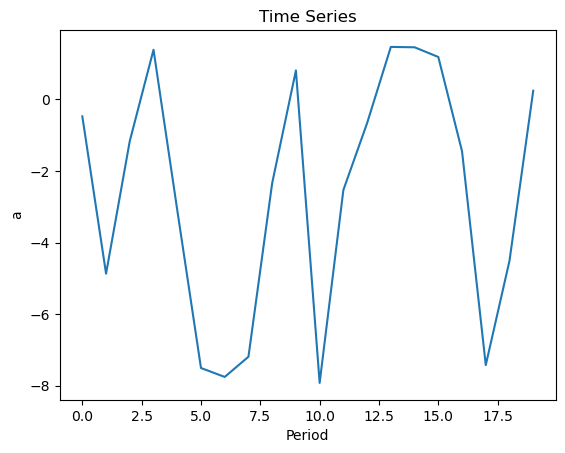

In [4]:
# Solution (a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
delta1 = 0.6
delta2 = -0.2
mu = -1
sigma = 3

# Initial values
a0 = 0
a_minus1 = 0

# Number of periods
T = 20

# Generate the time series
a = np.empty(T)
a[0] = delta1 * a0 + delta2 * a_minus1 + np.random.normal(mu, sigma)
a[1] =  delta1 * a[0] + delta2 * a0 + np.random.normal(mu, sigma)

for t in range(2, T):
    a[t] =  delta1 * a[t-1] + delta2 * a[t-2] + np.random.normal(mu, sigma)

# Plot the time series
plt.plot(a)
plt.xlabel('Period')
plt.ylabel('a')
plt.title('Time Series')
plt.show()

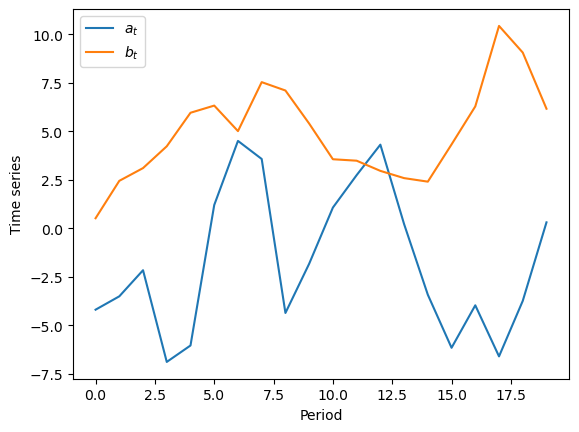

In [5]:
# Solution (b)

# Parameters for a_t
delta1 = 0.6
delta2 = -0.2
mu = -1
sigma = 3

# Parameters for b_t
omega1 = 0.5
omega2 = -0.2
mu_n = 2
sigma_n = 2


# Initial values
a0 = 0
a_minus1 = 0
b0 = 0

# Number of periods
T = 20

# Generate the time series
a = np.empty(T)
a[0] = delta1 * a0 + delta2 * a_minus1 + np.random.normal(mu, sigma)
a[1] =  delta1 * a[0] + delta2 * a0 + np.random.normal(mu, sigma)

b = np.empty(T)
b[0] = omega1*b0+omega2*a[0] + np.random.normal(mu_n, sigma_n)
b[1] = omega1*b[0]+omega2*a[1] + np.random.normal(mu_n, sigma_n)


for t in range(2, T):
    a[t] =  delta1 * a[t-1] + delta2 * a[t-2] + np.random.normal(mu, sigma)
    b[t] = omega1*b[t-1]+omega2*a[t] + np.random.normal(mu_n, sigma_n)

# Plot the time series
plt.plot(a, label = '$a_t$')
plt.plot(b, label = '$b_t$')
plt.xlabel('Period')
plt.ylabel('Time series')
plt.legend()
plt.show()

In [6]:
# Solution (c)

# Number of periods
T = 100000

# Generate the time series
a = np.empty(T)
a[0] = delta1 * a0 + delta2 * a_minus1 + np.random.normal(mu, sigma)
a[1] =  delta1 * a[0] + delta2 * a0 + np.random.normal(mu, sigma)

b = np.empty(T)
b[0] = omega1*b0+omega2*a[0] + np.random.normal(mu_n, sigma_n)
b[1] = omega1*b[0]+omega2*a[1] + np.random.normal(mu_n, sigma_n)


for t in range(2, T):
    a[t] =  delta1 * a[t-1] + delta2 * a[t-2] + np.random.normal(mu, sigma)
    b[t] = omega1*b[t-1]+omega2*a[t] + np.random.normal(mu_n, sigma_n)

a_m = np.mean(a)
a_sd = np.std(a)
b_m = np.mean(b)
b_sd = np.std(b)

a_m, a_sd, b_m, b_sd

(-1.664688442715053, 3.5394977068750877, 4.664335084328902, 2.5366880301658505)

In [7]:
# Solution (d)

corr_ab = np.corrcoef(a,b)
corr_ab

array([[ 1.        , -0.35830667],
       [-0.35830667,  1.        ]])

In [8]:
# Solution (e)

# Parameters for a_t
delta1 = 0.6
delta2 = -0.2
mu = -1
sigma = 3

# Parameters for b_t
omega1 = 0.5
omega2 = -0.2
mu_n = 0
sigma_n = 2


# Initial values
a0 = 0
a_minus1 = 0
b0 = 0

# Number of periods
T = 100000

# Generate the time series
a = np.empty(T)
a[0] = delta1 * a0 + delta2 * a_minus1 + np.random.normal(mu, sigma)
a[1] =  delta1 * a[0] + delta2 * a0 + np.random.normal(mu, sigma)

b = np.empty(T)
b[0] = omega1*b0+omega2*a[0] + np.random.normal(mu_n, sigma_n)
b[1] = omega1*b[0]+omega2*a[1] + np.random.normal(mu_n, sigma_n)

for t in range(2, T):
    a[t] =  delta1 * a[t-1] + delta2 * a[t-2] + np.random.normal(mu, sigma)
    b[t] = omega1*b[t-1]+omega2*a[t] + np.random.normal(mu_n, sigma_n)
    
np.corrcoef(a,b)


array([[ 1.        , -0.35148595],
       [-0.35148595,  1.        ]])

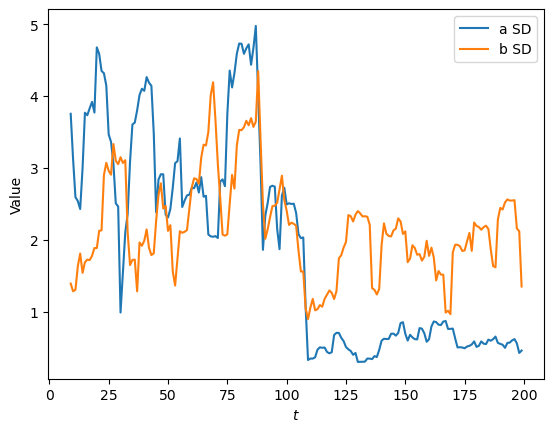

In [9]:
# Solution (f)



# Parameters for a_t
delta1 = 0.6
delta2 = -0.2
mu = -1
sigma = 3

# Parameters for b_t
omega1 = 0.5
omega2 = -0.2
mu_n = 2
sigma_n = 2


# Initial values
a0 = 0
a_minus1 = 0
b0 = 0

# Number of periods
T = 100

# Generate the time series
a = np.empty(2*T)
a[0] = delta1 * a0 + delta2 * a_minus1 + np.random.normal(mu, sigma)
a[1] =  delta1 * a[0] + delta2 * a0 + np.random.normal(mu, sigma)

b = np.empty(2*T)
b[0] = omega1*b0+omega2*a[0] + np.random.normal(mu_n, sigma_n)
b[1] = omega1*b[0]+omega2*a[1] + np.random.normal(mu_n, sigma_n)


for t in range(2, T):
    a[t] =  delta1 * a[t-1] + delta2 * a[t-2] + np.random.normal(mu, sigma)
    b[t] = omega1*b[t-1]+omega2*a[t] + np.random.normal(mu_n, sigma_n)

sigma_new = 0.5
for t in range(T, 2*T):
    a[t] =  delta1 * a[t-1] + delta2 * a[t-2] + np.random.normal(mu, sigma_new)
    b[t] = omega1*b[t-1]+omega2*a[t] + np.random.normal(mu_n, sigma_n)

data = pd.DataFrame({'at': a, 'bt': b})

rolling_astd = data["at"].rolling(window=10).std()
rolling_bstd = data["bt"].rolling(window=10).std()

plt.figure()
rolling_astd.plot(label='a SD')
rolling_bstd.plot(label='b SD')
plt.legend()
#plt.title('5-Year Rolling Mean and Std Dev of inflation_yoy')
plt.xlabel('$t$')
plt.ylabel('Value')
plt.show()

## Problem 3 (13 points)

Start with the following imports:

```python
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
```

For this problem, you will need the formula for the sum of the first $n$ terms of a geometric series, which is given by:


$$\sum\limits_{k=0}^{n}r^k = \left( \frac{1-r^{n+1}}{1-r}\right).$$



Assume that after four years of college you have to decide whether you want to pursue a Ph.D. in Economics, which takes six years in which you earn relatively little, or go straight to work. 




Let

- $ R > 1 $ be the gross rate of return  
- $ t = 0, 1, 2, \ldots T $ denote the years that you can either work or pursue a Ph.D. in Economics  
- $ 0 $ denote the initial period in which you can start working if you go straight to work after college  
- $ T $ denote the last period  that you work  
- $ w_t^c $ be the wage at time $ t $ if you go straight to work after college and you decide not to get a Ph.D. in Economics
- $ w_t^p $ be the wage at time $ t $ that you get while you pursue a Ph.D. in Economics
- $ w_t^e $ be the wage at time $ t $ that you would get after you obtained a Ph.D. in Economics and now you work as an economist.
- $ \gamma_e > 1 $ be the (gross) rate of growth of wages of an economist that obtained a Ph.D. in Economics, so that
  $ w_t^e = w_0^e \gamma_e^t $


To summarize, if you decide not to pursue a Ph.D. in Economics and rather decide to go to work immediately after college, you will receive $w^c_t$ for $ t = 0, 1, 2, \ldots T $. The wage in that case remains constant, $w^c_t = w^c_0$ for all $t = 0, 1, 2, ..., T$. 

If you decide to pursue a Ph.D., you will get $ w_t^p $ in periods $t = 0, 1, 2, ..., 5$ and then $ w_t^e $ in periods $t = 6, 7, 8, ..., T$. The wage during the Ph.D. is constant, $w_t^p = w_0^p$ for all $t = 0, 1, 2, ..., 5$.

In your Python code, call $\gamma_e$ either `gamma_e` or `γ_e`.

### (a) (2 points)

Compute the present value of going to work immediately without pursuing a Ph.D. in Economics. (__Hint:__ you do not need Python for this.)


#### Solution:

$$c_0 = w^c_0 \underbrace{\frac{1-(R^{-1})^{T+1}}{1-R^{-1}}}_{= A_c} $$

### (b) (3 points)

Compute the present value of pursuing a Ph.D. in Economics (which takes six years and you earn $w_t^p$ in these six years) and then work as an economist for the remaining years in which the wage is $w^e_t$. (__Hint:__ you do not need Python for this.)

#### Solution:

$$e_0 = \sum\limits_{t=0}^5 w^p_0R^{-t} + \sum\limits_{t=6}^Tw^e_0(R^{-1}\gamma_e)^t = w^p_0\underbrace{\frac{1-(R^{-1})^6}{1-R^{-1}}}_{= A_p} + w^e_0\underbrace{R^{-6}\gamma_e^6 \frac{1-(R^{-1}\gamma_e)^{T-5}}{1-R^{-1}\gamma_e}}_{= A_e}$$

### (c) (4 points)

Compute the two present values obtained in __(a)__ and __(b)__ using Python using the following values for the parameters:

- $ R = 1.05 $     
- $ T = 45 $  
- $ w_t^c = 1 $ for all periods $t = 1, 2, ..., T$
- $ w_t^p = 0.5$ for $t = 1, 2, ..., 6$
- $ \gamma_e = 1 $
- $ w_0^e = 1 $

Which career path yields a higher present value?

### (d) (2 points)

How would your answer in __(c)__ change if $\gamma_e = 1.03$? Explain why.

### (e) (2 points)

Use the same parameterization as in __(d)__ but assume that the interest rate is now given by $R = 1.2$. Which career path yields now the higher present value? Explain why.

In [10]:
# Solution (c)

import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Define the namedtuple for the model
Model = namedtuple('Model', 'R T Tp γ_e w_c0 w_e0 w_p0')

def create_m(R=1.05,   # gross rate of return
               T=45,     # time horizon
               Tp = 6, # length of PhD
               γ_e=1, # economist wage growth
               w_c0=1,   # initial wage (college)
               w_p0=0.5,   # initial wage (graduate school)
               w_e0=1,   # initial wage (economist)
              ):
    
    return Model(R, T, Tp, γ_e, w_c0, w_e0, w_p0)

def compute_npvs(model):
    R, T, Tp, γ_e, w_c0, w_e0, w_p0 = model
    
    A_c = (1 - (1/R)**(T+1)) / (1 - 1/R)
    A_p = (1 - (1/R)**(Tp)) / (1 - 1/R) 
    A_e = R**(-Tp)*γ_e**(Tp)*(1-(γ_e/R)**(T+1-Tp))/(1-(γ_e/R))

    npv_c = A_c*w_c0
    npv_e = A_p*w_p0 + A_e*w_e0
    return npv_c, npv_e


exc = create_m()
npv_c1, npv_e1 = compute_npvs(exc)
npv_c1, npv_e1 # npv_c is higher, so don't do a PhD.

(18.77406982167732, 16.10933148636191)

In [11]:
# Solution (d)
exd = create_m(γ_e = 1.03)
npv_c2, npv_e2 = compute_npvs(exd)
npv_c2, npv_e2 # npv_e is now higher, so do a PhD.

(18.77406982167732, 27.768060870087318)

In [12]:
# Solution (e)
exe = create_m(γ_e = 1.03, R = 1.2)
npv_c3, npv_e3 = compute_npvs(exe)
npv_c3, npv_e3 # npv_c is now higher again, so do a PhD.

(5.998632857034473, 4.8117638432891825)

## Problem 4 (11 points)

Start with the following imports:

```python
import numpy as np
import matplotlib.pyplot as plt
```

Consider the market for cars. Consumers that buy a car have to order the car one period before they receive it and they do not know the price that they will have to pay. Therefore, they have to form expectations about the price that they will have to pay. 

Consumers form their expectations about the period-$t$ price in period $t-1$, and we denote these expectations by $p^e_{t|t-1}$.

The demand for cars is given by

$$D(p^e_{t|t-1}) = d_0 - d_1 \cdot sin(p^e_{t|t-1}), $$

where $sin()$ is the sine function (the sine function is provided by the `numpy` library as `sin`).

Set $d_0 = 5$ and $d_1 = 3$.

### (a) (2 points)

Plot the demand function $D(p^e_{t|t-1})$ for values of $p^e_{t|t-1}$ between 5 and 8.


### (b) (2 points)

Supply of cars is given by

$$S(p_t) = s_0 + s_1 \cdot p_t. $$

Set $s_0 = 0.5$ and $s_1 = 0.75$.

Plot the supply function $S(p_t)$ for values of $p_t$ between 5 and 8.


### (c) (1 point)

In equilibrium, demand equals supply:

$$D(p_t) = S(p^e_{t|t-1}). $$

Express the equilibrium price $p_t$ as a function of $p^e_{t|t-1}$. Hint: you don't need Python for this exercise.

__Solution:__ $p_t = \frac{1}{s_1}\left(d_0 - s_0 - d_1 sin(p^e_{t|t-1}) \right)$. (If students plug in the values for the parameters, this is fine.)

### (d) (2 points)

Consider 5 periods: $t = 1, 2, 3, 4, 5$, and assume that the price expectations of consumers are exogenous. In particular, assume that they are given by:

$$\{p^e_{t|t-1}\}_{t=1}^{5} = \{6, 6.5, 7, 7.5, 8 \}.$$

Plot the time series of the equilibrium price $p_t$ for these 5 periods. Explain what you see and why.

### (e) (2 points)

Now, instead of assuming exogenous price expectations, assume that consumers hold adaptive expectations. That means that their expected price for the next period depends on what they expected the price to be this period and the current price:

$$p^e_{t|t-1} = \alpha p_{t-1} + (1-\alpha) p^e_{t-1|t-2}.$$

Plot the equilibrium price $p_t$ for $t = 1, 2, ..., 30$ for $\alpha = 0.1$, $\alpha = 0.3$, and $\alpha = 0.7$. Set the initial price expectations $p^e_{1|0} = 6$. What do you observe? Does the price converge to a steady state? How does $\alpha$ affect the price dynamics?

### (f) (2 points)

Simulate 300 periods for the case with $\alpha = 0.1$ starting with $p^e_{1|0} = 6$. Take the last observation of these 300 periods as your new starting value: $p^e_{1|0}$ and then re-do problem __(e)__ but plot 50 periods. What do you observe? In particular, why do you think do you see these particular dynamics for the case in which $\alpha = 0.7$?

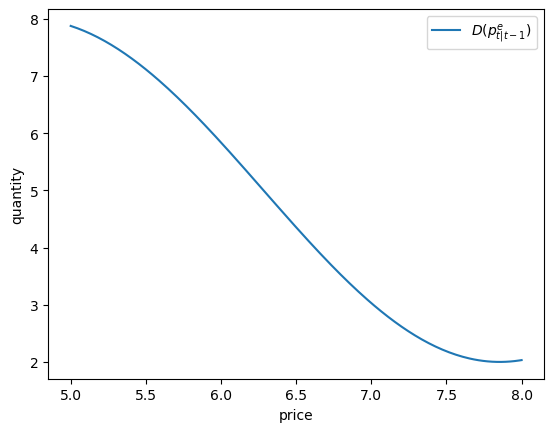

In [13]:
# Solution (a):

import numpy as np
import matplotlib.pyplot as plt

p_grid = np.linspace(5, 8, 200)
d_0 = 5
d_1 = 3

def demand(pe):
    return d_0 - np.sin(pe)*d_1

fig, ax = plt.subplots()

ax.plot(p_grid, demand(p_grid), label="$D(p^e_{t|t-1})$")
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()

plt.show()

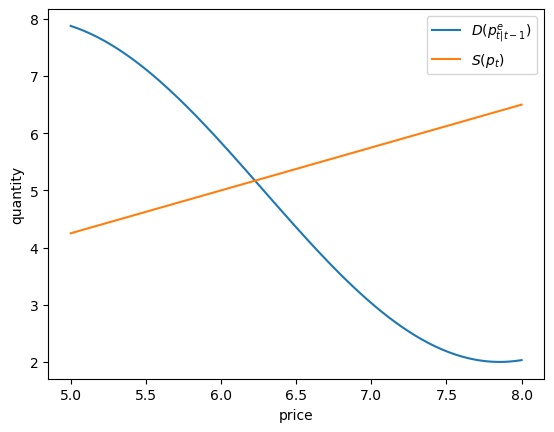

In [14]:
# Solution (b):


p_grid = np.linspace(5, 8, 200)
s_0 = 0.5
s_1 = .75

def supply(p):
    return s_0 + p*s_1

fig, ax = plt.subplots()

ax.plot(p_grid, demand(p_grid), label="$D(p^e_{t|t-1})$")
ax.plot(p_grid, supply(p_grid), label="$S(p_t)$")
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()

plt.show()

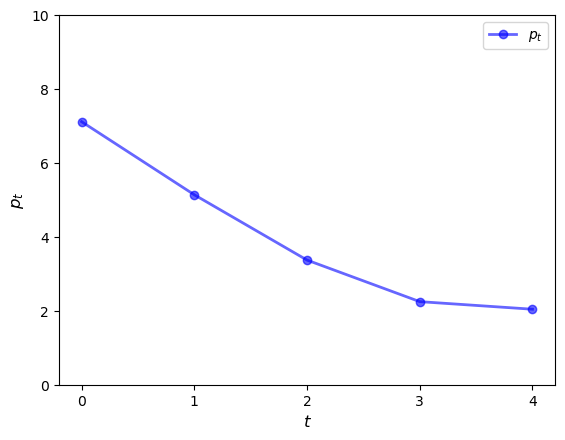

In [15]:
# Solution (d)
pe_grid = np.linspace(6,8,5)
def eq_p(pe):
    return 1/s_1 * (d_0 - s_0 - d_1*np.sin(pe))


def ts_plot_price(y_a=0, y_b= 10,    # Controls y-axis
                  ts_length=5):     # Length of time series

    fig, ax = plt.subplots()
    ax.set_xlabel(r'$t$', fontsize=12)
    ax.set_ylabel(r'$p_t$', fontsize=12)
    p = eq_p(pe_grid) #np.empty(ts_length)
    #for t in range(1, ts_length):
    #    p[t] = eq_p(pe_grid[t] )
    ax.plot(np.arange(ts_length),
            p,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'$p_t$')
    ax.legend(loc='best', fontsize=10)
    ax.set_ylim(y_a, y_b)
    ax.set_xticks(np.arange(ts_length))
    plt.show()


ts_plot_price(ts_length=5)

# we see decreasing equilibrium price, because when consumers have higher price expectations, they demand less and therefore, the eq price decreases.

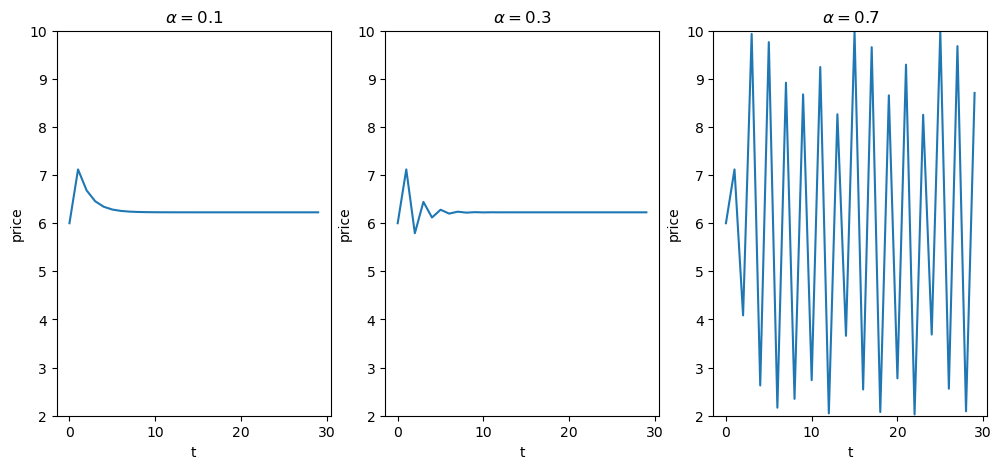

In [19]:
# Solution (e)
def find_next_price_adaptive(curr_price_exp):
    return 1/s_1 * (d_0 - s_0 - d_1*np.sin(curr_price_exp))
    
def ts_price_plot_adaptive(p0, ts_length=30, α=[0.1,0.3, 0.7]):
    fig, axs = plt.subplots(1, len(α), figsize=(12, 5))
    for i_plot, a in enumerate(α):
        pe_last = p0
        p_values = np.empty(ts_length)
        p_values[0] = p0
        for i in range(1, ts_length):
            p_values[i] = find_next_price_adaptive(pe_last)
            pe_last = a*p_values[i] + (1 - a)*pe_last

        axs[i_plot].plot(np.arange(ts_length), p_values)
        axs[i_plot].set_title(r'$\alpha={}$'.format(a))
        axs[i_plot].set_xlabel('t')
        axs[i_plot].set_ylabel('price')
        axs[i_plot].set_ylim(2,10)
    plt.show()


ts_price_plot_adaptive(6, ts_length=30)

In [20]:
# Solution (f)

# Solution (e)
def find_next_price_adaptive(curr_price_exp):
    return 1/s_1 * (d_0 - s_0 - d_1*np.sin(curr_price_exp))
    
def price_adaptive(p0, ts_length=30, α=[0.1]):
    for i_plot, a in enumerate(α):
        pe_last = p0
        p_values = np.empty(ts_length)
        p_values[0] = p0
        for i in range(1, ts_length):
            p_values[i] = find_next_price_adaptive(pe_last)
            pe_last = a*p_values[i] + (1 - a)*pe_last
    return p_values
   # plt.show()

periods = 300
p_vals = price_adaptive(6, periods)
p0_new = p_vals[periods-1]

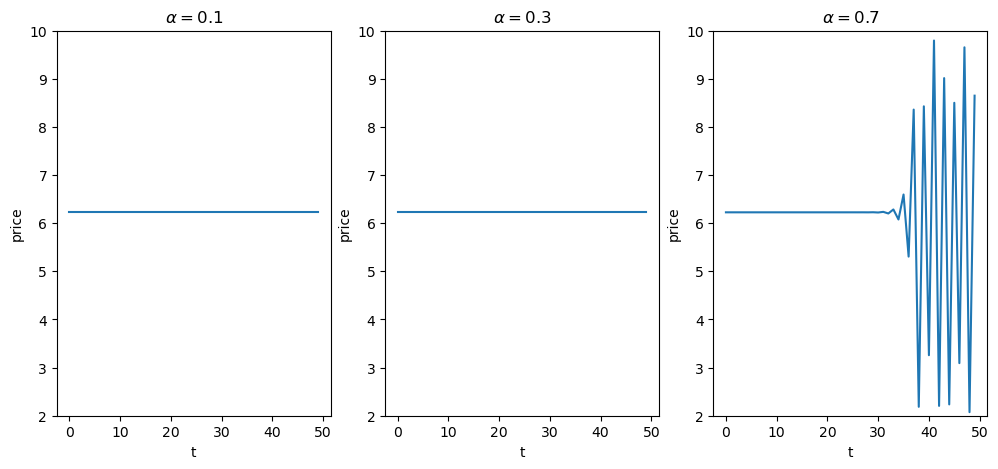

In [21]:

ts_price_plot_adaptive(p0_new, ts_length=50)